Import statemets

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Get Data

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
pwd

'C:\\Users\\Hammer'

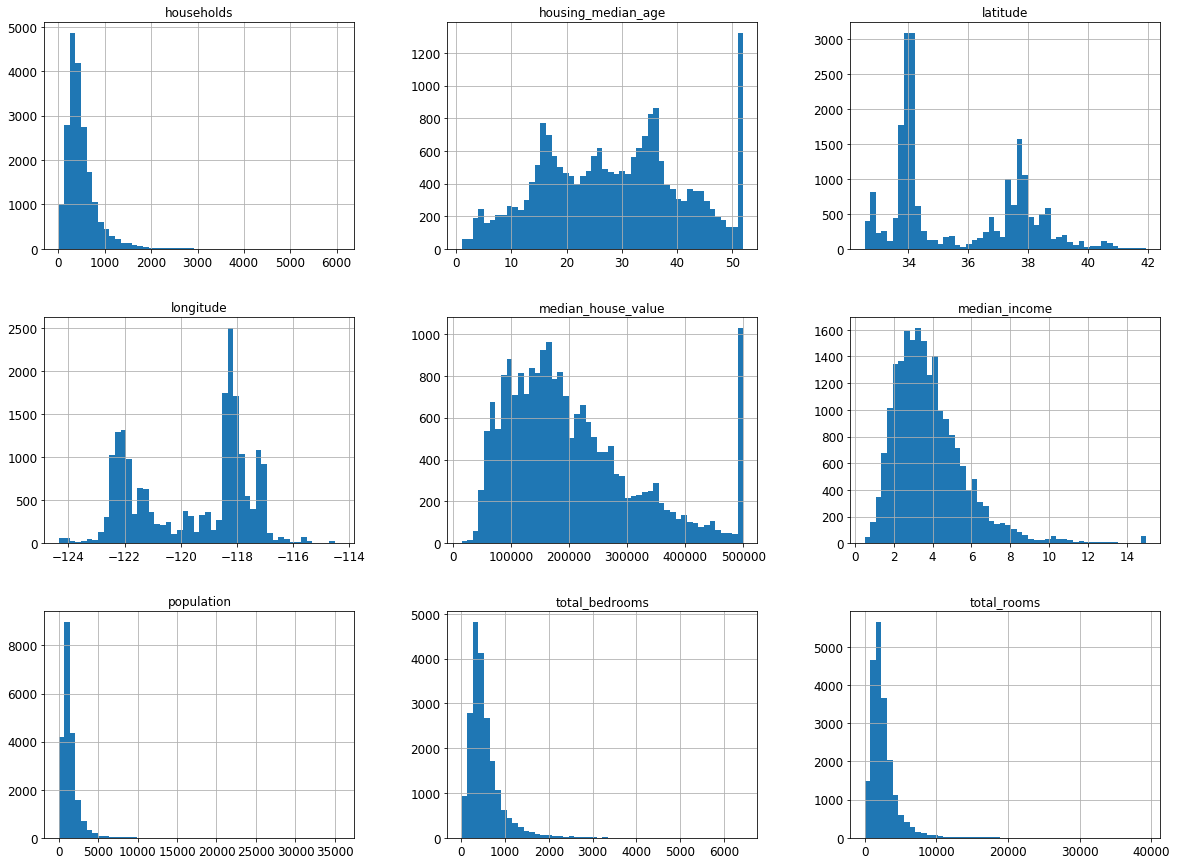

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#Spliting test dataset

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
#sklearn test_train split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

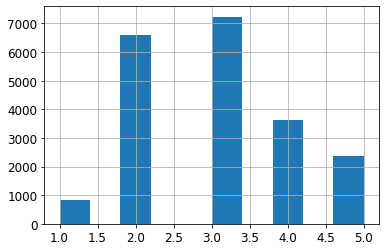

In [13]:
#Considering median income histogram above, the data can be divided into categories (0-1.5),(1,5-3),(3-4.5) etc

housing["income_cat"] = pd.cut(housing['median_income'],bins=[0, 1.5, 3, 4.5, 6., np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [14]:
#Sklearn Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [16]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()

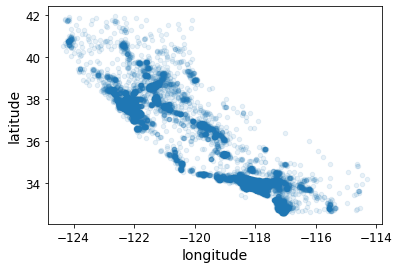

In [17]:
#Since the dataset includes latitude and logitude, we can try plotting a scatter plot
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1) #alpha here, provides a high density plot

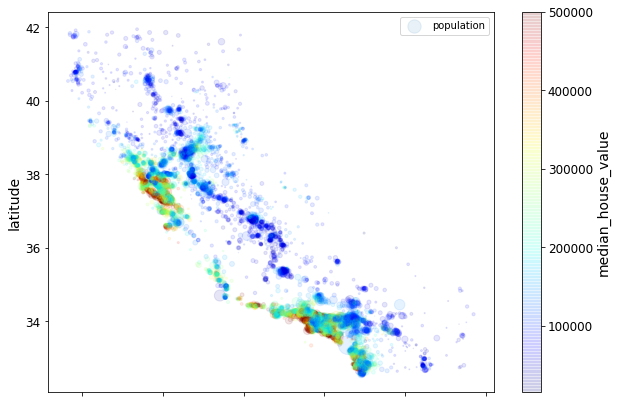

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1,s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [19]:
#Standard Correlation coefficient between every pair of attributes
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#when the correlation is close to 1, there is a positive correlation with the attribute(directly proportional), likewise in case
#the value is close to -1, there is a negative correlation (inverse correlation)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014800F25080>,
      dtype=object)

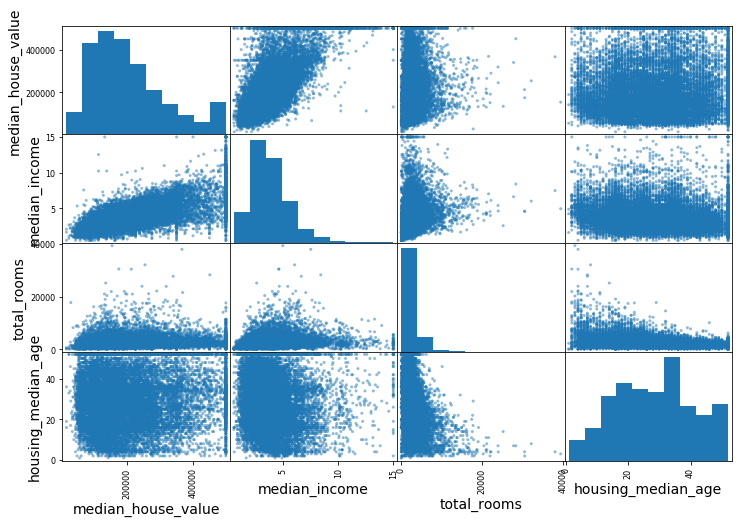

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

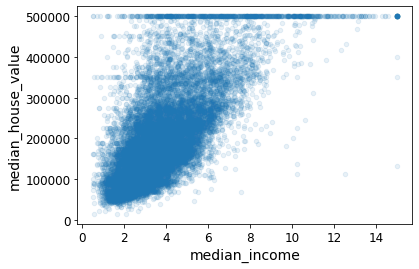

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [23]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
#Here the imputer has simply computed the median of each numeric attribute and store the result in statistics_ instance variable
print(imputer.statistics_)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [26]:
X = imputer.transform(housing_num)

In [27]:
#Handling categorical date
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_encoded_cat = ordinal_encoder.fit_transform(housing_cat)
housing_encoded_cat[:10]

#We can get the list of category names using categories_ instance variable
print(ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#the output here is a SCIpy sparse matrix instead of a Numpy array
print(housing_cat_1hot)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0


In [30]:
#Custom Transformers:For creating your own transformer, we need to create a class and implement three methods: fit(), transform()
# fit_transform(). The last one can be added by simply adding TransformerMixen() class as base class.Also by adding BaseEstimator()
# class 

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        


In [31]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_addribs = attr_adder.transform(housing.values)

In [32]:
#Feature Scalling (MinMaxScaler & Standardization)



Transformation Pipelines

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler()),])

housing_num_r = num_pipeline.fit_transform(housing_num)

#Using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)

OneHotEncoder return a sparse matrix(mostly contain zero values), while num_pipeline returns a dense matrix (noon zero matrix). During such a mix, the ColumnTransformer estimates the density of final matrix (ratio of non zero cells) and returns a sparse matrix if density is lower than given threshold i.e sparse_threshold=0.3

In [34]:
#Training and Evaluating on the Training Set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [36]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [37]:
#calculating RMSE on whole training set

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#Not good enuf!

68628.19819848923

DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [40]:
#K-Fold cross validation: This randomly splits the training set into 10 folds
#(distinct subsets),and train each fold 10 times picking different folds each 
#time and training on other 9 fields. The result is array with 10 eavaluation
#scores

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [42]:
display_scores(tree_rmse_scores)

Scores: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean: 70666.74616904806
Standard Deviation: 2928.322738055112


In [43]:
#CaLculating same scores for Linear Regression model
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)


In [44]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798346


RandomForestRegressor : Random forests work by training many Decision Trees on random subsets of the features and then averaging out the predictions (Ensemble Learniing)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)


C:\Users\Hammer\Anaconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hammer\Anaconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hammer\Anaconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hammer\Anaconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hammer\

In [54]:
display_scores(forest_rmse_scores)

Scores: [51951.29707563 50497.02561776 52327.54223936 54025.24834209
 52446.30795549 56699.46223903 51434.08872866 51134.86005437
 54147.36476673 51824.85932752]
Mean: 52648.80563466373
Standard Deviation: 1739.4090874439348


In [55]:
#Saving your models
#from sklearn.externals import joblib

#joblib.dump(my_model, "my_model.pkl")
#and later
#my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},{'bootstrap':[False], 'n_estimators':[3,10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search =  GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
print(grid_search.best_param_)

In [ ]:
print(grid_search.best_estimator_)

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63814.54572996999 {'max_features': 2, 'n_estimators': 3}
55922.66703295058 {'max_features': 2, 'n_estimators': 10}
52881.97996979615 {'max_features': 2, 'n_estimators': 30}
60566.47524552496 {'max_features': 4, 'n_estimators': 3}
52378.460587310175 {'max_features': 4, 'n_estimators': 10}
50547.411412555055 {'max_features': 4, 'n_estimators': 30}
59187.182580844514 {'max_features': 6, 'n_estimators': 3}
51798.808639071416 {'max_features': 6, 'n_estimators': 10}
50239.79997515509 {'max_features': 6, 'n_estimators': 30}
58395.17982948642 {'max_features': 8, 'n_estimators': 3}
52639.561716974364 {'max_features': 8, 'n_estimators': 10}
49683.27489921775 {'max_features': 8, 'n_estimators': 30}
62126.271917261256 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55028.44300232585 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60272.22583112469 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52945.03861261024 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [61]:
#Analysing models and their errors
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.45385882e-02, 5.92295042e-02, 4.25600855e-02, 1.52121086e-02,
       1.50178951e-02, 1.54235652e-02, 1.42596003e-02, 3.64307114e-01,
       4.45246722e-02, 1.11552756e-01, 6.43090641e-02, 5.98982380e-03,
       1.77336000e-01, 4.22680433e-05, 2.47187615e-03, 3.22507812e-03])

In [63]:
#display these scores next to the attribute value
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [64]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3643071138257494, 'median_income'),
 (0.1773360004744366, 'INLAND'),
 (0.11155275620749713, 'pop_per_hhold'),
 (0.06453858816723762, 'longitude'),
 (0.0643090641479344, 'bedrooms_per_room'),
 (0.05922950417935604, 'latitude'),
 (0.04452467217359187, 'rooms_per_hhold'),
 (0.042560085478888204, 'housing_median_age'),
 (0.015423565237162732, 'population'),
 (0.01521210864111356, 'total_rooms'),
 (0.01501789505830789, 'total_bedrooms'),
 (0.014259600291230993, 'households'),
 (0.005989823804079009, '<1H OCEAN'),
 (0.0032250781178214723, 'NEAR OCEAN'),
 (0.0024718761523272554, 'NEAR BAY'),
 (4.2268043265906444e-05, 'ISLAND')]

In [66]:
#Evaluating your system on the test set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [67]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46055.43315857, 49947.60068129])